### Sklearn Classification Tree

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [2]:
# Load the data
diabetes = pd.read_csv('./datasets/diabetes.csv')

In [3]:
# Divide features and target variable transforming them into matrices
X = diabetes.drop(['Outcome'], axis=1).values
y = diabetes['Outcome'].values

# Split the dataset into training and test sets through hold-out strategy
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

Do we need data normalization if we use a DECISION TREE?
The answer is no. Why?
The process of scaling data through normalization is to ensure that a specific feature is not prioritized 
over another due to the feature values magnitude. In the case of decision trees, the algorithm makes decisions based 
on comparisons of feature values at different nodes of the tree, and the relative ordering of the values is what 
matters, not their absolute scale. Indeed, we just split data.

In [4]:
# Create a decision tree classifier
'''
criterion: the function to measure the quality of a split
min_samples_leaf: sets the minimum number of samples required to be at a leaf node
max_depth:  limits the maximum depth of the decision tree

<< min_samples_leaf & >> max_depth  --->  more complexity (overfitting)
>> min_samples_leaf & << max_depth  --->  less complexity (underfitting)
'''

criterion = 'entropy'
min_samples_leaf = 2
max_depth = 5
clf = DecisionTreeClassifier(criterion=criterion, min_samples_leaf=min_samples_leaf, max_depth=max_depth, random_state=42)

# Train the classifier
clf = clf.fit(X_train, y_train)

In [5]:
# Compute predictions
y_pred = clf.predict(X_test)

# Evaluation of the model
print(f"Accuracy TEST: {accuracy_score(y_test, y_pred)}")
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy TEST: 0.7922077922077922
Confusion Matrix:
 [[83 17]
 [15 39]]


In [6]:
# Compute predictions on the training set and evaluating the model on such predictions
# Just for observing overfitting/underfitting
y_pred_train = clf.predict(X_train)
print(f"Accuracy TRAINING: {accuracy_score(y_train, y_pred_train)}")

Accuracy TRAINING: 0.8110749185667753


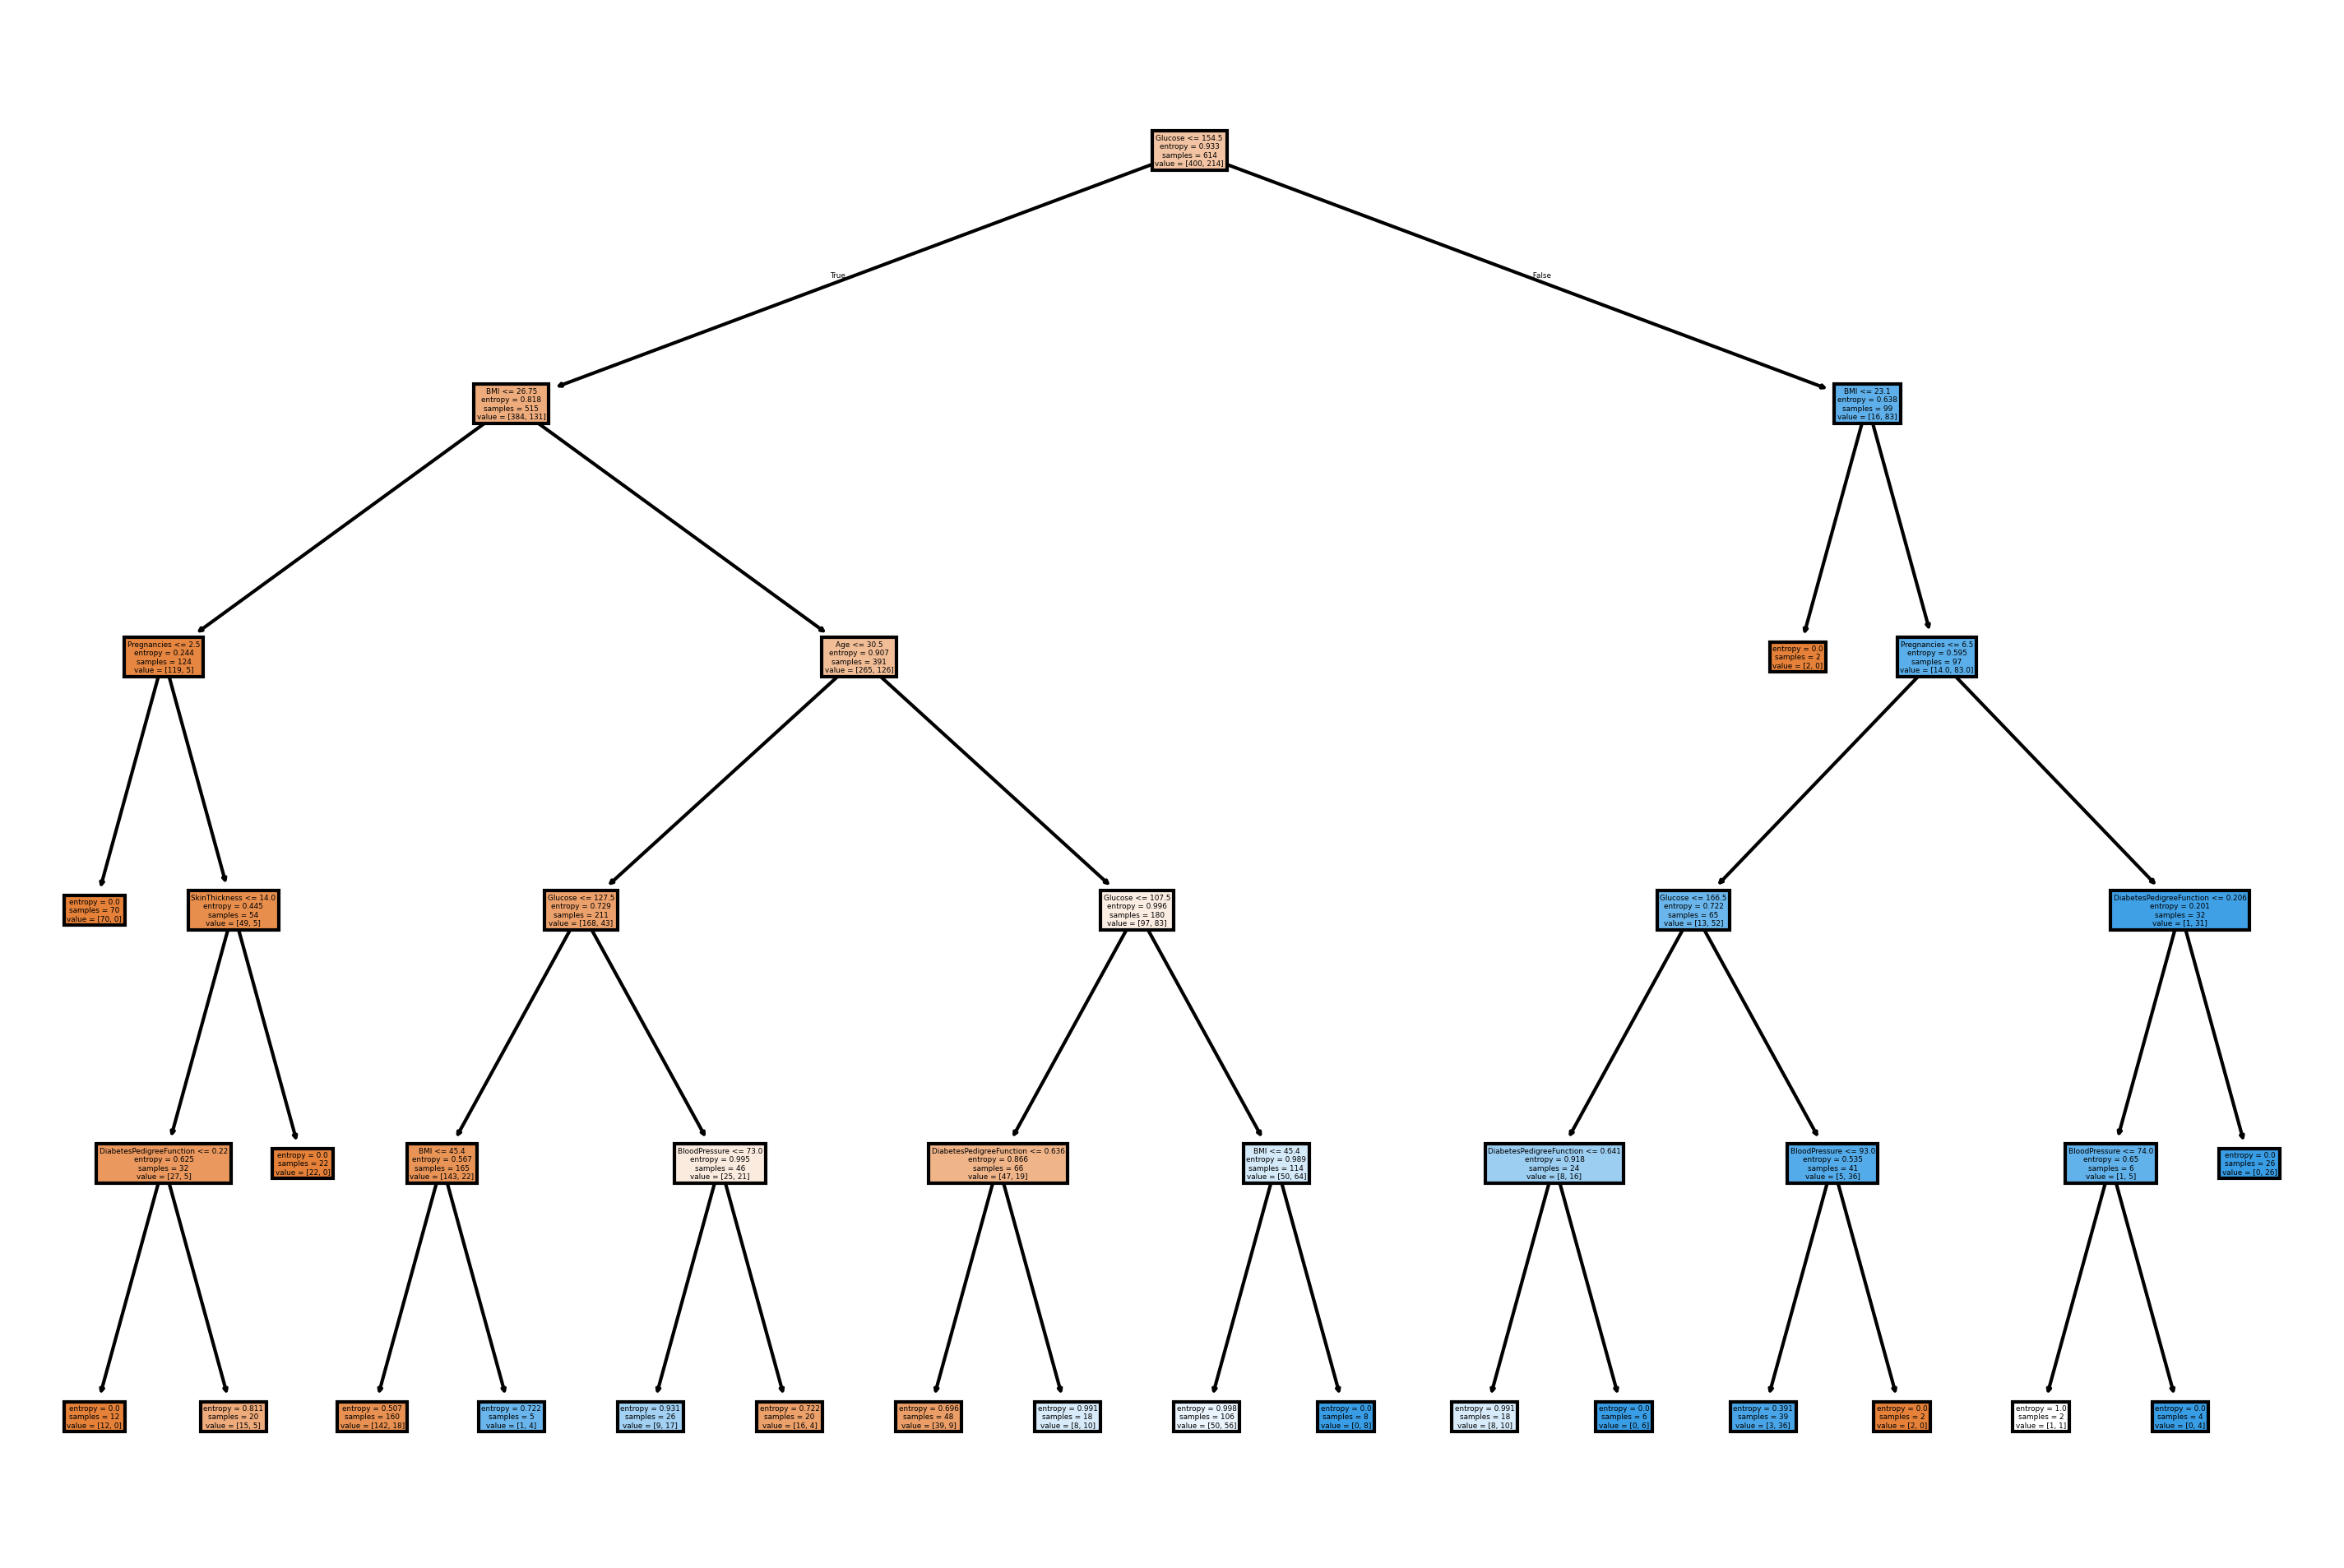

In [8]:
# Plot the tree
plt.figure(figsize=(12, 8), dpi=300)
plot_tree(clf, feature_names=diabetes.columns, filled=True)
plt.show()